In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import jax.numpy as jnp 
from jax import random

from sgmcmcjax.samplers import build_sgld_sampler

# Logistic Regression

In [2]:
from sgmcmcjax.models.logistic_regression import gen_data, loglikelihood, logprior

key = random.PRNGKey(42)
dim = 10
Ndata = 100000 

theta_true, X, y_data = gen_data(key, dim, Ndata)



generating data, with N=100000 and dim=10


## Option 1: import sampler directly

In [3]:
batch_size = int(0.01*X.shape[0])
data = (X, y_data)

my_sampler = build_sgld_sampler(1e-5, loglikelihood, logprior, data, batch_size)

  0%|          | 0/10000 [00:00<?, ?it/s]

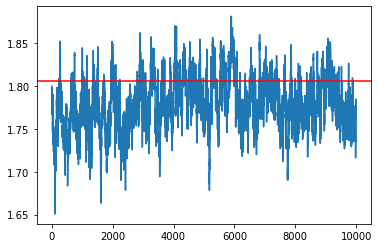

CPU times: user 3.06 s, sys: 110 ms, total: 3.17 s
Wall time: 2.83 s


In [4]:
%%time

# Run sampler
key = random.PRNGKey(0)
Nsamples = 10000
samples = my_sampler(key, Nsamples, theta_true)

idx = 7
plt.plot(np.array(samples)[:, idx])
plt.axhline(theta_true[idx], c='r')
plt.show()